In [37]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
db = json.load(open("../datasets/usda_food/database.json"))

In [4]:
len(db)

6636

In [5]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [6]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

In [7]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [8]:
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [12]:
pd.value_counts(nutrients.group)

Amino Acids    54
Vitamins       42
Elements       30
Composition    15
Other          15
Energy          6
Name: group, dtype: int64

In [9]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)

In [10]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [13]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)

In [14]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [16]:
nutrients.duplicated().sum()

14179

In [17]:
nutrients = nutrients.drop_duplicates()

In [20]:
pd.value_counts(nutrients.units)

g          150924
mg         122620
mcg         67074
IU          10151
kcal         6636
kJ           6608
mcg_RAE      5699
mcg_DFE      5464
Name: units, dtype: int64

In [21]:
col_mapping = {
    'description': 'food',
    'group': 'fgroup'
}
info = info.rename(columns=col_mapping, copy=False)

In [23]:
info[:7]

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,


In [24]:
col_mapping = {
    'description': 'nutrient',
    'group': 'nutgroup'
}
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [25]:
nutrients.head()

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [26]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [28]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [29]:
ndata.iloc[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [30]:
result = ndata.groupby(["nutrient", "fgroup"])['value'].quantile(0.5)

In [32]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.9000
                  Vegetables and Vegetable Products     2.1800
Alanine           Baby Foods                            0.0850
                  Baked Products                        0.2480
                  Beef Products                         1.5500
                  Beverages                             0.0030
                  Breakfast Cereals                     0.3110
                  Cereal Grains and Pasta               0.3730
                  Dairy and Egg Products                0.2710
                  Ethnic Foods                          1.2900
                  Fast Foods                            0.5140
                  Fats and Oils                         0.0000
                  Finfish and Shellfish Products        1.2180
                  Fruits and Fruit Juices               0.0270
                  Lamb, Veal, and Game Products         1.4080
   

In [36]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

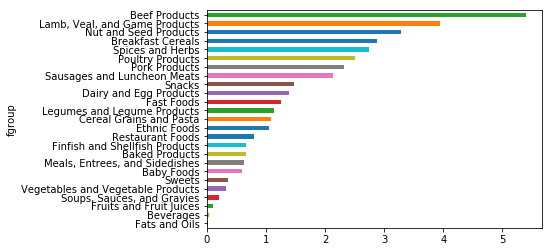

In [38]:
plt.show()